# Overall Comparison of each Method on MSFT (2011/01/01 to 2013/12/30)



In [1]:
! brew install ta-lib
! pip install ta-lib mplfinance

==> Auto-updating Homebrew...
Adjust how often this is run with HOMEBREW_AUTO_UPDATE_SECS or disable with
HOMEBREW_NO_AUTO_UPDATE. Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> Downloading https://ghcr.io/v2/homebrew/portable-ruby/portable-ruby/blobs/sha256:7645e2d653a335798030f6502e7834dfdbeeec5629429a1a34da5dbb2c57d63e
######################################################################### 100.0%
==> Pouring portable-ruby-3.3.8.arm64_big_sur.bottle.tar.gz
==> Auto-updated Homebrew!
Updated 4 taps (dotenvx/brew, hashicorp/tap, homebrew/core and homebrew/cask).
==> New Formulae
dblab           fedify          intermodal      pyp             twitch-cli
dockerfmt       ftxui           nip4            tfcmt
erlfmt          hub-tool        otterdog        tsui
==> New Casks
antinote                   excire-foto                ijhttp
comfyui                    font-adwaita               ndi-tools
companion                  font-exile                 notion-mail
compan

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import talib
from datetime import datetime
import matplotlib.ticker as mticker
import os

cwd = os.getcwd()
print(cwd)
os.chdir(cwd)   

/Users/lin1214/Desktop/lin1214/github/SPLab


## Data Loading

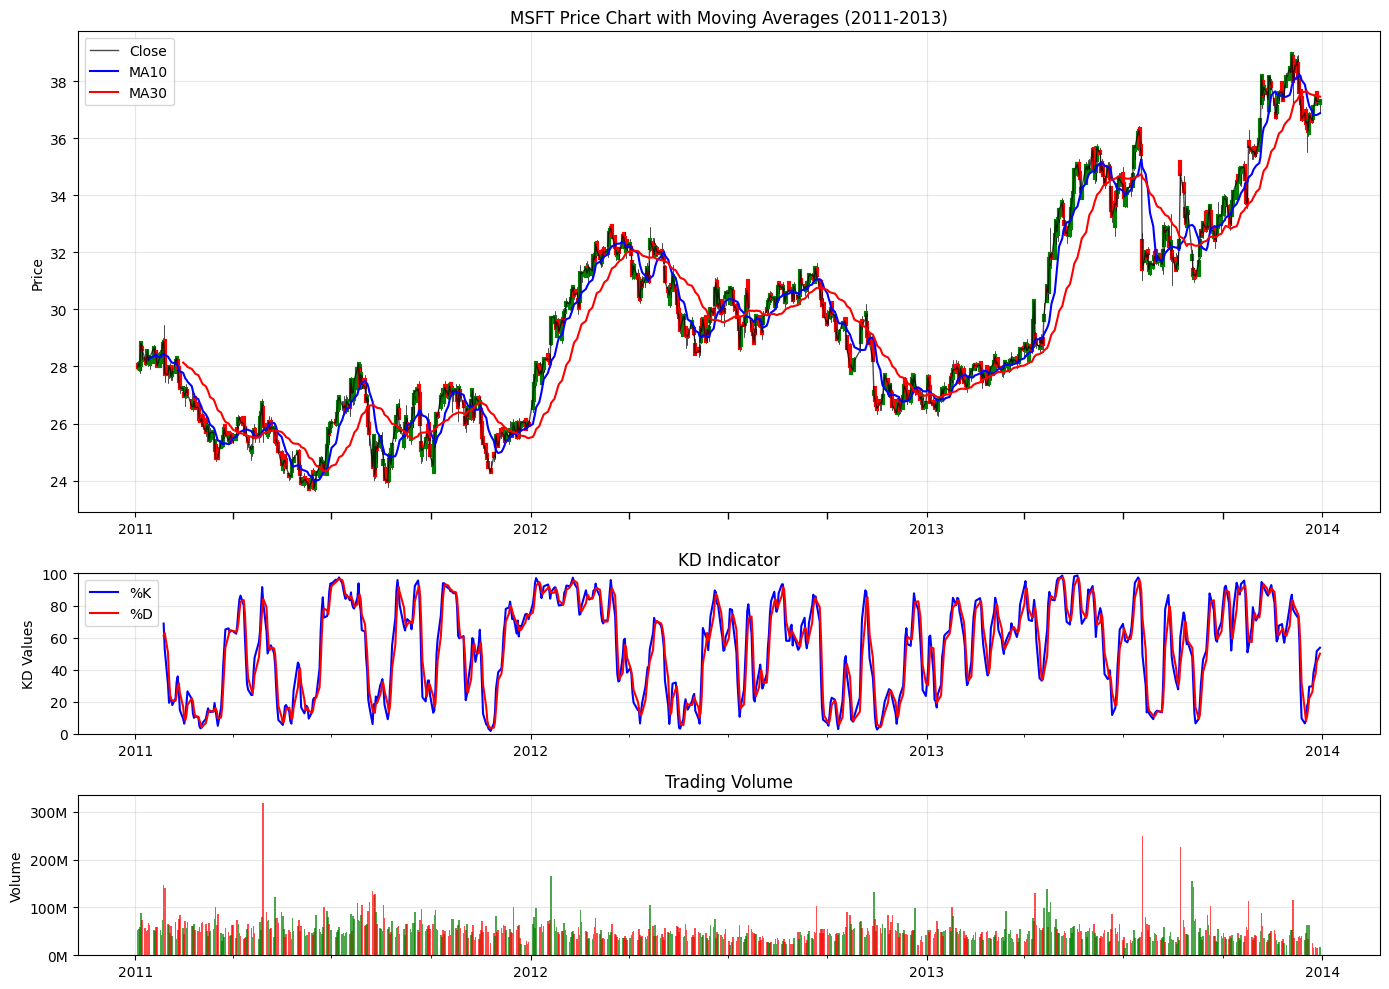

In [4]:
# Load the MSFT data
df = pd.read_csv('MSFT.csv')

# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the date as index
df.set_index('Date', inplace=True)

# Filter data for the required period (2011/01/01 to 2013/12/30)
df = df.loc['2011-01-01':'2013-12-30']

# Calculate moving averages
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA30'] = df['Close'].rolling(window=30).mean()

# Calculate KD indicators
df['K'], df['D'] = talib.STOCH(df['High'], df['Low'], df['Close'], 
                              fastk_period=14, slowk_period=3, slowk_matype=0, 
                              slowd_period=3, slowd_matype=0)

# Create subplots
fig = plt.figure(figsize=(14, 10))
gs = fig.add_gridspec(3, 1, height_ratios=[3, 1, 1])

# a) Price chart with moving averages
ax1 = fig.add_subplot(gs[0])

# Plot high and low as a vertical line
for i in range(len(df)):
    date = df.index[i]
    high = df['High'].iloc[i]
    low = df['Low'].iloc[i]
    open_price = df['Open'].iloc[i]
    close_price = df['Close'].iloc[i]
    
    # Plot the high-low line
    ax1.plot([date, date], [low, high], color='black', linewidth=0.5)
    
    # Determine color based on whether close is higher than open
    color = 'green' if close_price >= open_price else 'red'
    
    # Plot the open-close body
    ax1.plot([date, date], [open_price, close_price], color=color, linewidth=3)

# Add close price and moving averages
ax1.plot(df.index, df['Close'], label='Close', color='black', linewidth=1.0, alpha=0.7)
ax1.plot(df.index, df['MA10'], label='MA10', color='blue', linewidth=1.5)
ax1.plot(df.index, df['MA30'], label='MA30', color='red', linewidth=1.5)

# Format x-axis with minimal labels
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.tick_params(axis='x', which='major', labelsize=10)
ax1.tick_params(axis='x', which='minor', length=5, width=1.0)

# Add labels and legend
ax1.set_ylabel('Price')
ax1.set_title('MSFT Price Chart with Moving Averages (2011-2013)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# b) KD line chart
ax2 = fig.add_subplot(gs[1], sharex=ax1)

# Plot KD lines
ax2.plot(df.index, df['K'], label='%K', color='blue')
ax2.plot(df.index, df['D'], label='%D', color='red')

# Add labels and legend
ax2.set_ylabel('KD Values')
ax2.set_title('KD Indicator')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 100)

# c) Volume bar chart
ax3 = fig.add_subplot(gs[2], sharex=ax1)

# Plot volume bars with colors based on price movement
colors = ['green' if df['Close'].iloc[i] >= df['Open'].iloc[i] else 'red' for i in range(len(df))]
ax3.bar(df.index, df['Volume'], color=colors, alpha=0.7, width=1.5)

# Add labels
ax3.set_ylabel('Volume')
ax3.set_title('Trading Volume')
ax3.grid(True, alpha=0.3)

# Format y-axis to show volume in millions
ax3.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{x/1000000:.0f}M'))

# Remove x-axis labels from the first two plots
ax1.set_xticklabels([])
ax2.set_xticklabels([])

# Only show year labels on the bottom plot
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax3.xaxis.set_major_locator(mdates.YearLocator())

# Adjust layout
plt.tight_layout()
plt.show()

## Kalman Filter

In [6]:
! pip install pykalman
! pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
  Using cached pykalman-0.10.1-py2.py3-none-any.whl.metadata (9.5 kB)
Using cached pykalman-0.10.1-py2.py3-none-any.whl (248 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 8.7 MB/s eta 0:00:00a 0:00:01
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
from pykalman import KalmanFilter
from statsmodels.tsa.stattools import adfuller

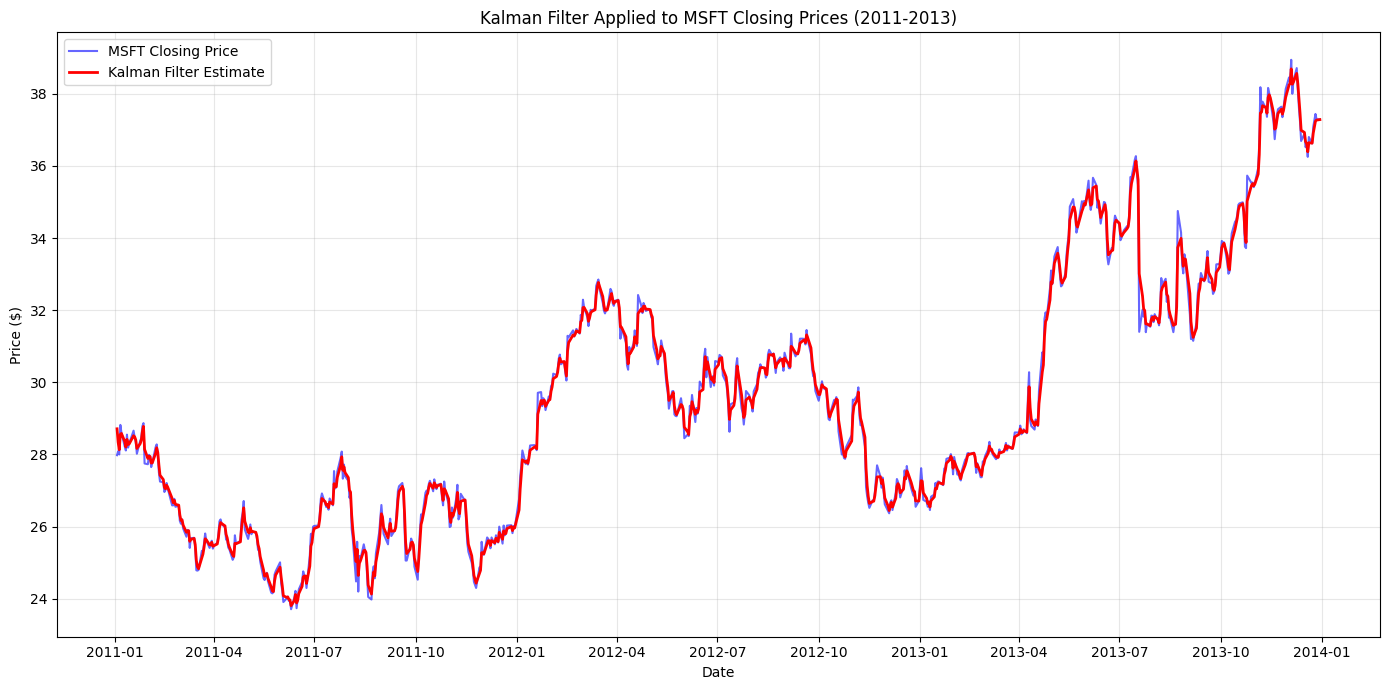

KF MSE: 0.0333
KF RMSE: 0.1825


In [23]:
observations = df['Close'].values

# Modify Kalman Filter for 2D state with log-volume
kf = KalmanFilter(
    transition_matrices=np.eye(1),
    observation_matrices=np.eye(1),
    initial_state_mean=np.array([np.mean(df['Close'])]),
    initial_state_covariance=np.diag([np.var(df['Close'])]),
    observation_covariance=np.diag([np.var(df['Close'])]),
    transition_covariance=1 * np.diag([np.var(df['Close'])])
)

# Run the filter
state_means, state_covs = kf.filter(observations.reshape(-1, 1))

# Extract the estimated values
df['KF_Price'] = state_means.flatten()
df['KF_Variance'] = state_covs.flatten()
# df['KF_Upper'] = df['KF_Price'] + 1.96 * np.sqrt(df['KF_Variance'])
# df['KF_Lower'] = df['KF_Price'] - 1.96 * np.sqrt(df['KF_Variance'])

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='MSFT Closing Price', color='blue', alpha=0.6)
plt.plot(df.index, df['KF_Price'], label='Kalman Filter Estimate', color='red', linewidth=2)
# plt.fill_between(df.index, df['KF_Lower'], df['KF_Upper'], color='red', alpha=0.2, label='95% Confidence Interval')

# Format x-axis
plt.gca().xaxis.set_major_locator(MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Add labels and legend
plt.title('Kalman Filter Applied to MSFT Closing Prices (2011-2013)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate error metrics
df['Error'] = df['Close'] - df['KF_Price']
kf_mse = np.mean(df['Error']**2)
kf_rmse = np.sqrt(kf_mse)

# Print results
print(f"KF MSE: {kf_mse:.4f}")
print(f"KF RMSE: {kf_rmse:.4f}")

## Particle Filter

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import os

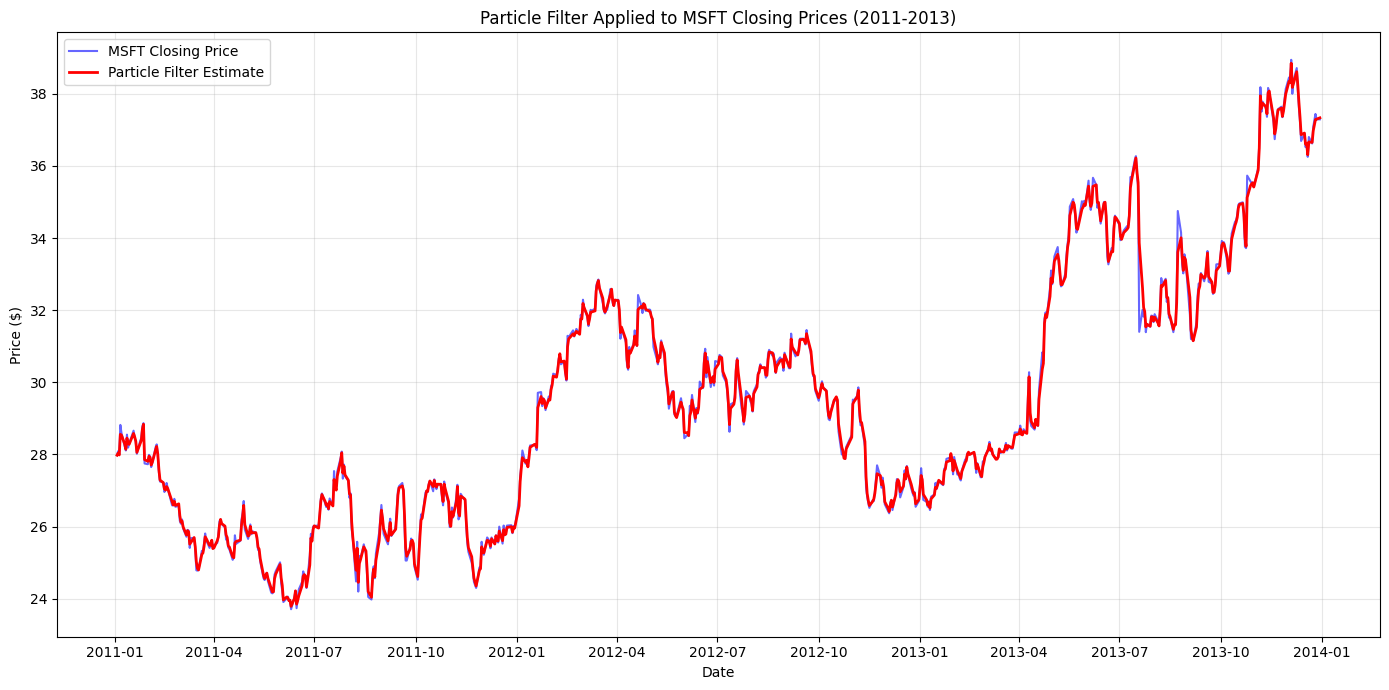

Error Metrics:
PF MSE: 0.0211
PF RMSE: 0.1454


In [25]:
# Assuming df is already loaded with MSFT data from 2011-01-01 to 2013-12-30
# and has columns: Open, High, Low, Close, Volume with Date as index

# Particle Filter Implementation
class ParticleFilter:
    def __init__(self, n_particles=1000, process_noise=0.1, measurement_noise=0.1, initial_value=None):
        self.n_particles = n_particles
        self.process_noise = process_noise
        self.measurement_noise = measurement_noise
        self.initial_value = initial_value
        self.particles = None
        self.weights = None
        
    def initialize(self, initial_value):
        # Initialize particles around the initial value
        self.particles = np.random.normal(initial_value, self.process_noise, self.n_particles)
        self.weights = np.ones(self.n_particles) / self.n_particles
        
    def predict(self):
        # Simple random walk model with noise
        self.particles = self.particles + np.random.normal(0, self.process_noise, self.n_particles)
        
    def update(self, measurement):
        # Update weights based on likelihood of measurement
        self.weights = self.weights * norm.pdf(measurement, self.particles, self.measurement_noise)
        
        # Normalize weights
        if np.sum(self.weights) > 0:
            self.weights = self.weights / np.sum(self.weights)
        else:
            # If all weights are zero, reinitialize
            self.weights = np.ones(self.n_particles) / self.n_particles
            self.particles = np.random.normal(measurement, self.process_noise, self.n_particles)
            
    def resample(self):
        # Resample particles based on weights
        indices = np.random.choice(range(self.n_particles), size=self.n_particles, p=self.weights)
        self.particles = self.particles[indices]
        self.weights = np.ones(self.n_particles) / self.n_particles
        
    def estimate(self):
        # Return weighted mean and variance of particles
        mean = np.sum(self.particles * self.weights)
        variance = np.sum(self.weights * (self.particles - mean)**2)
        return mean, variance

# Apply Particle Filter to MSFT data
observations = df['Close'].values
n_particles = 2000
process_noise = 0.5  # Adjust based on expected day-to-day price movement
measurement_noise = 0.3  # Adjust based on expected observation noise

# Initialize arrays to store results
filtered_means = np.zeros(len(observations))
filtered_variances = np.zeros(len(observations))

# Create and initialize particle filter
pf = ParticleFilter(n_particles, process_noise, measurement_noise)
pf.initialize(observations[0])
filtered_means[0] = observations[0]
filtered_variances[0] = process_noise**2

# Run particle filter
for t in range(1, len(observations)):
    pf.predict()
    pf.update(observations[t])
    
    # Store estimated mean and variance
    filtered_means[t], filtered_variances[t] = pf.estimate()
    
    # Resample if effective number of particles is too low
    n_eff = 1.0 / np.sum(pf.weights**2)
    if n_eff < n_particles / 2:
        pf.resample()

# Add results to dataframe
df['PF_Price'] = filtered_means
df['PF_Variance'] = filtered_variances

# Calculate error metrics
df['Error'] = df['Close'] - df['PF_Price']
pf_mse = np.mean(df['Error']**2)
pf_rmse = np.sqrt(pf_mse)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='MSFT Closing Price', color='blue', alpha=0.6)
plt.plot(df.index, df['PF_Price'], label='Particle Filter Estimate', color='red', linewidth=2)

# Format x-axis
plt.gca().xaxis.set_major_locator(MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Add labels and legend
plt.title('Particle Filter Applied to MSFT Closing Prices (2011-2013)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print evaluation metrics
print(f"Error Metrics:")
print(f"PF MSE: {pf_mse:.4f}")
print(f"PF RMSE: {pf_rmse:.4f}")


## ARMA & ARIMA

Testing stationarity of original data:
ADF Statistic: -1.0106678035102103
p-value: 0.7493536066451973

Data is not stationary. Testing first difference:
ADF Statistic: -27.251916115346557
p-value: 0.0

Best ARIMA(2, 1, 2) model found with AIC: 892.29


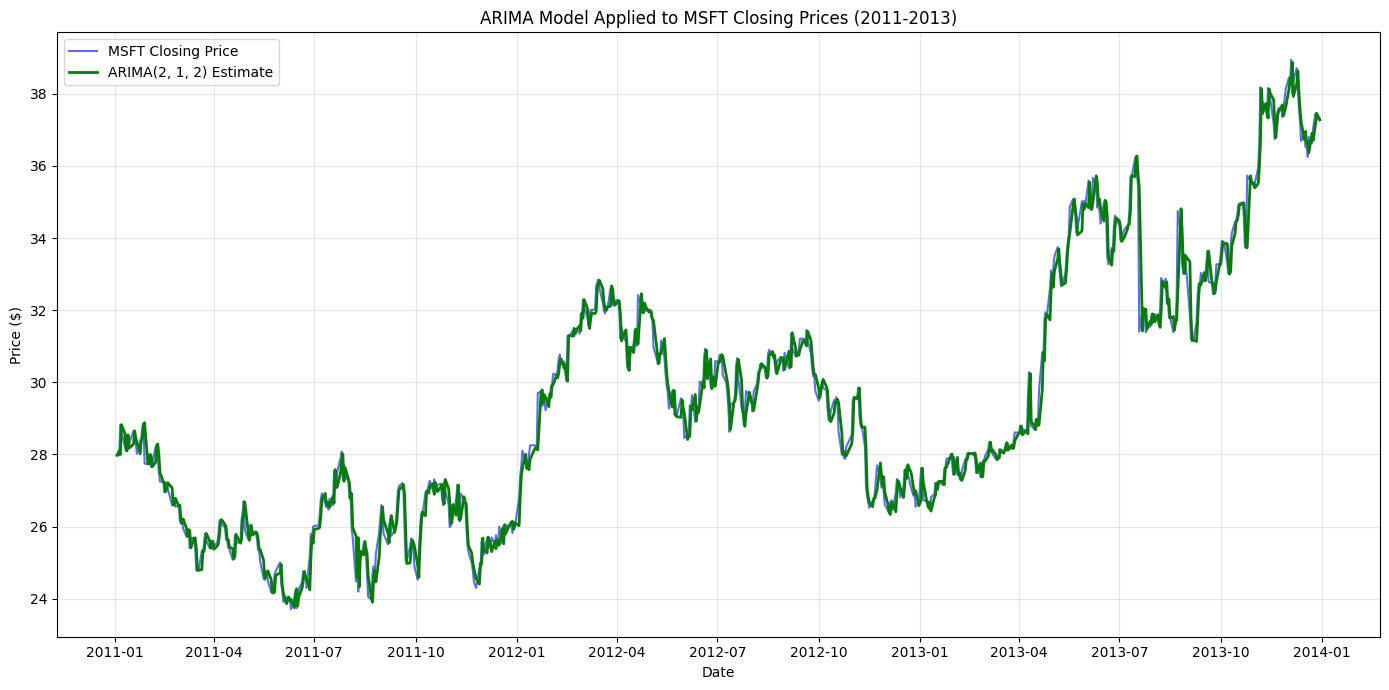


Error Metrics:
ARIMA MSE: 0.19
ARIMA RMSE: 0.43


In [50]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Check stationarity
def check_stationarity(data):
    adf_result = adfuller(data)
    print('ADF Statistic:', adf_result[0])
    print('p-value:', adf_result[1])
    return adf_result[1] < 0.05

# Perform ADF test on original data
print("Testing stationarity of original data:")
is_stationary = check_stationarity(df['Close'])

if not is_stationary:
    print("\nData is not stationary. Testing first difference:")
    df['Close_diff'] = df['Close'].diff().dropna()
    # print(df['Close_diff'])
    is_diff_stationary = check_stationarity(df['Close_diff'][1:])
    data_to_use = df['Close_diff']
    d = 1
else:
    data_to_use = df['Close']
    d = 0

# Try different combinations of p and q
best_aic = np.inf
best_order = None
best_model = None

# Grid search for p and q values
for p in range(0, 3):
    for q in range(0, 3):
        try:
            # Create and fit the ARIMA model
            model = ARIMA(df['Close'], order=(p, d, q))
            results = model.fit()
            
            # Update best model if current AIC is lower
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = (p, d, q)
                best_model = results
                
        except Exception as e:
            continue

if best_model is not None:
    print(f"\nBest ARIMA{best_order} model found with AIC: {best_aic:.2f}")
    
    # Get predictions
    predictions = best_model.fittedvalues
    # add the first value of df['Close'] to the predictions only one element cannot be concatenated
    predictions = np.concatenate([[df['Close'].iloc[0]], predictions[1:]])
    
    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['Close'], label='MSFT Closing Price', color='blue', alpha=0.6)
    plt.plot(
        df.index, 
        predictions, 
        label=f'ARIMA{best_order} Estimate', 
        color='green', 
        linewidth=2
    )

    # Format x-axis
    plt.gca().xaxis.set_major_locator(MonthLocator(interval=3))
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))

    # Add labels and legend
    plt.title('ARIMA Model Applied to MSFT Closing Prices (2011-2013)')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Calculate error metrics
    arima_mse = np.mean((df['Close'] - predictions) ** 2)
    arima_rmse = np.sqrt(arima_mse)
    arima_mae = np.mean(np.abs(df['Close'] - predictions))
    
    print("\nError Metrics:")
    print(f"ARIMA MSE: {arima_mse:.2f}")
    print(f"ARIMA RMSE: {arima_rmse:.2f}")
else:
    print("No suitable ARIMA model found.")

## Comparison of Kalman Filter, Particle Filter, ARMA & ARIMA




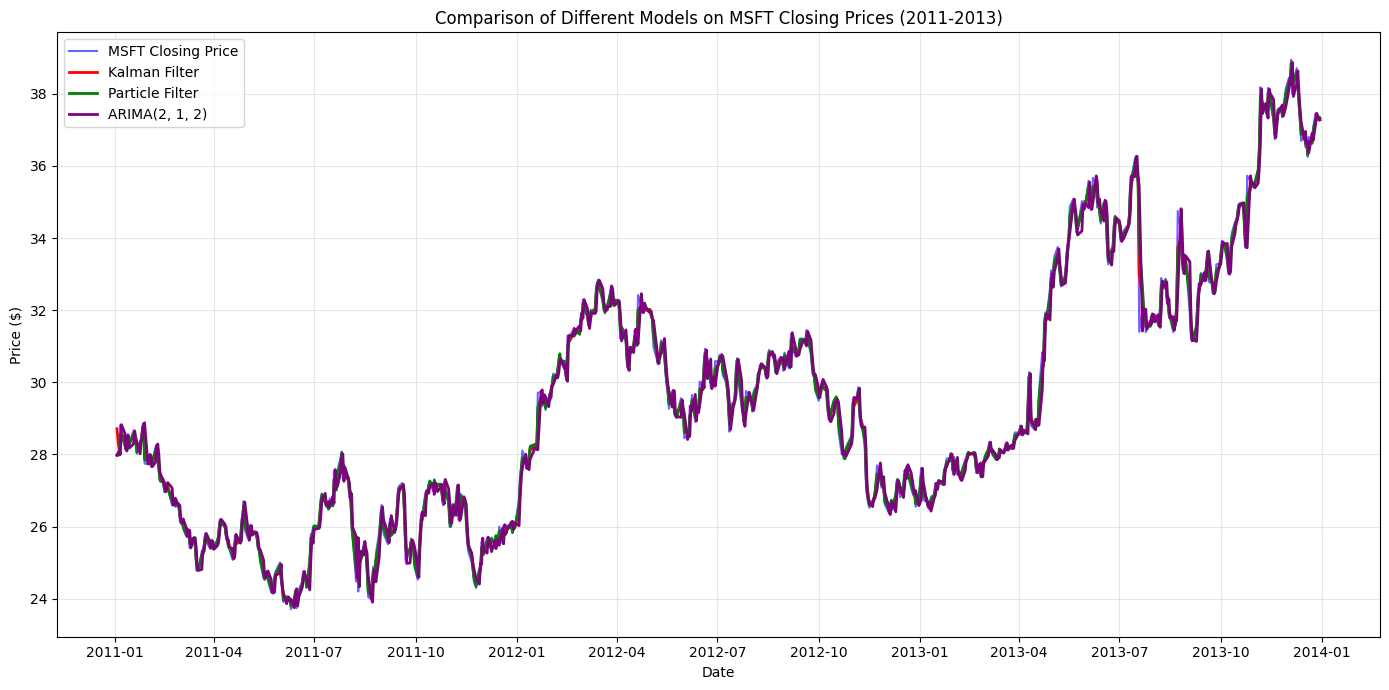

Error Metrics Comparison:
--------------------------------------------------
Model                    MSE         RMSE
--------------------------------------------------
Kalman Filter         0.0333       0.1825
Particle Filter       0.0211       0.1454
ARIMA                 0.1889       0.4346


In [51]:
# Create a combined plot
plt.figure(figsize=(14, 7))

# Plot original data and all three models
plt.plot(df.index, df['Close'], label='MSFT Closing Price', color='blue', alpha=0.6)
plt.plot(df.index, df['KF_Price'], label='Kalman Filter', color='red', linewidth=2)
plt.plot(df.index, df['PF_Price'], label='Particle Filter', color='green', linewidth=2)
plt.plot(df.index, predictions, label=f'ARIMA{best_order}', color='purple', linewidth=2)

# Format x-axis
plt.gca().xaxis.set_major_locator(MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Add labels and legend
plt.title('Comparison of Different Models on MSFT Closing Prices (2011-2013)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate and compare error metrics
print("Error Metrics Comparison:")
print("-" * 50)
print(f"{'Model':<15} {'MSE':>12} {'RMSE':>12}")
print("-" * 50)
print(f"{'Kalman Filter':<15} {kf_mse:>12.4f} {kf_rmse:>12.4f}")
print(f"{'Particle Filter':<15} {pf_mse:>12.4f} {pf_rmse:>12.4f}")
print(f"{'ARIMA':<15} {arima_mse:>12.4f} {arima_rmse:>12.4f}")

## Conclusion

Benefits:
- Risk Management: Help assess market volatility and set appropriate stop-loss levels
- Signal Generation: Identify potential trading opportunities and market entry/exit points
- Portfolio Optimization: Assist in dynamic asset allocation and portfolio rebalancing
- Market Analysis: Detect market inefficiencies and regime changes
- Decision Support: Provide quantitative backing for trading decisions
- Noise Reduction: Filter out market noise to reveal underlying trends
- Systematic Approach: Reduce emotional bias in trading decisions

Limitations:
- No True Prediction: Cannot reliably predict future stock prices
- Market Complexity: Unable to account for all market-influencing factors (news, sentiment, global events)
- Model Assumptions: Often assume normal market conditions and linear relationships
- Data Dependency: Historical patterns may not reflect future behavior
- Technical Constraints: Deep learning models require significant computational resources
- Overfitting Risk: Models may perform well on historical data but fail in live trading
- Market Adaptation: Successful strategies tend to lose effectiveness as they become widely adopted

# Machine Learning Methods


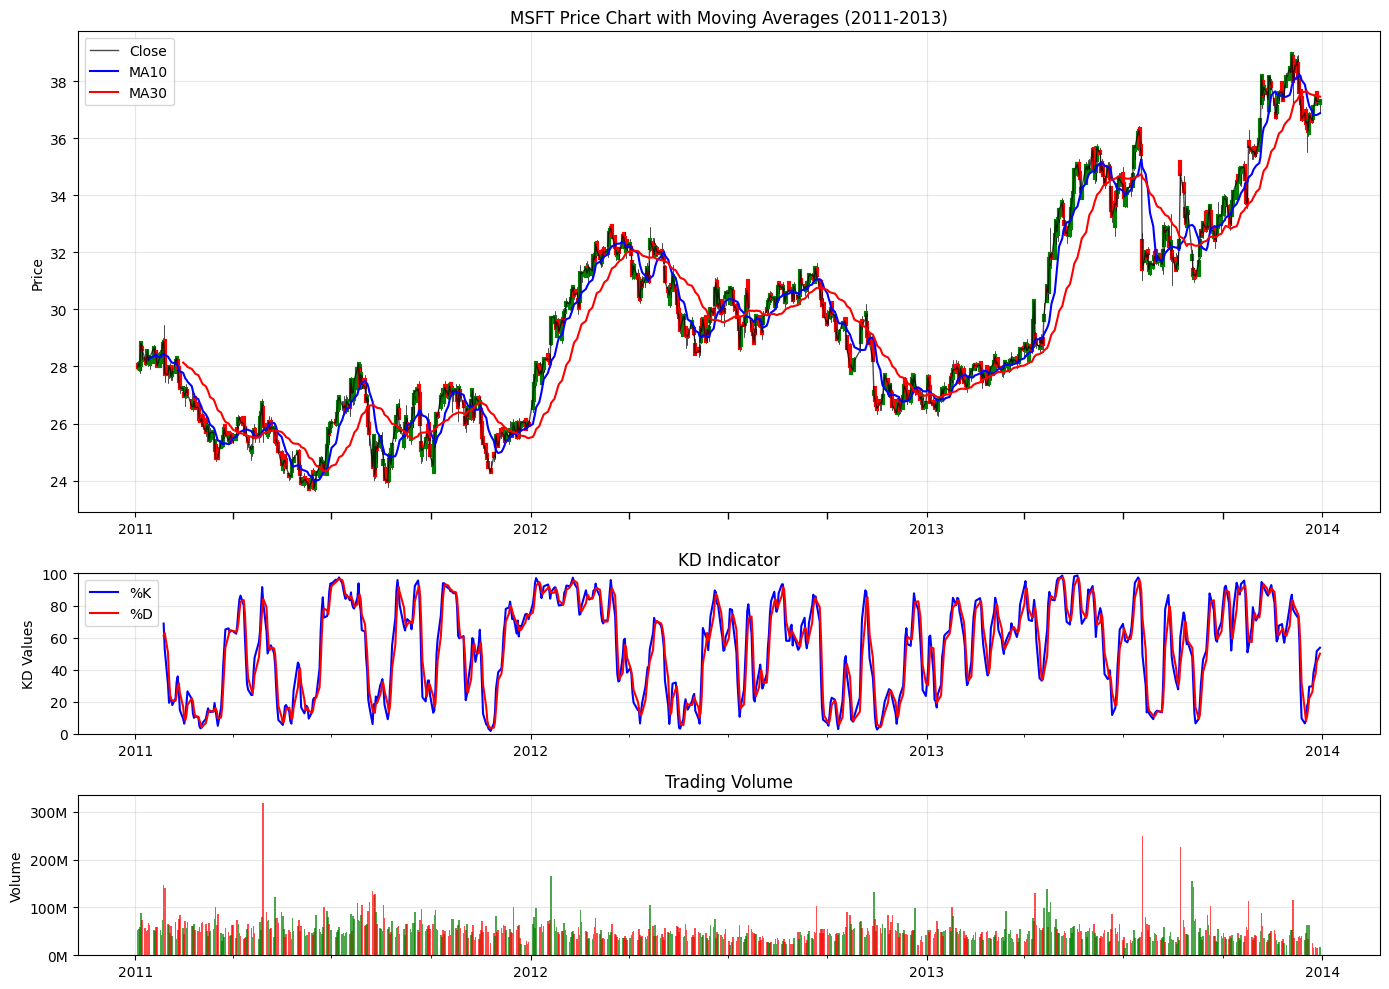

In [4]:
# Load the MSFT data
df = pd.read_csv('./MSFT.csv')

# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the date as index
df.set_index('Date', inplace=True)

# Filter data for the required period (2011/01/01 to 2013/12/30)
df = df.loc['2011-01-01':'2013-12-30']

# Calculate moving averages
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA30'] = df['Close'].rolling(window=30).mean()

# Calculate KD indicators
df['K'], df['D'] = talib.STOCH(df['High'], df['Low'], df['Close'],
                              fastk_period=14, slowk_period=3, slowk_matype=0,
                              slowd_period=3, slowd_matype=0)

# Create subplots
fig = plt.figure(figsize=(14, 10))
gs = fig.add_gridspec(3, 1, height_ratios=[3, 1, 1])

# a) Price chart with moving averages
ax1 = fig.add_subplot(gs[0])

# Plot high and low as a vertical line
for i in range(len(df)):
    date = df.index[i]
    high = df['High'].iloc[i]
    low = df['Low'].iloc[i]
    open_price = df['Open'].iloc[i]
    close_price = df['Close'].iloc[i]

    # Plot the high-low line
    ax1.plot([date, date], [low, high], color='black', linewidth=0.5)

    # Determine color based on whether close is higher than open
    color = 'green' if close_price >= open_price else 'red'

    # Plot the open-close body
    ax1.plot([date, date], [open_price, close_price], color=color, linewidth=3)

# Add close price and moving averages
ax1.plot(df.index, df['Close'], label='Close', color='black', linewidth=1.0, alpha=0.7)
ax1.plot(df.index, df['MA10'], label='MA10', color='blue', linewidth=1.5)
ax1.plot(df.index, df['MA30'], label='MA30', color='red', linewidth=1.5)

# Format x-axis with minimal labels
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.tick_params(axis='x', which='major', labelsize=10)
ax1.tick_params(axis='x', which='minor', length=5, width=1.0)

# Add labels and legend
ax1.set_ylabel('Price')
ax1.set_title('MSFT Price Chart with Moving Averages (2011-2013)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# b) KD line chart
ax2 = fig.add_subplot(gs[1], sharex=ax1)

# Plot KD lines
ax2.plot(df.index, df['K'], label='%K', color='blue')
ax2.plot(df.index, df['D'], label='%D', color='red')

# Add labels and legend
ax2.set_ylabel('KD Values')
ax2.set_title('KD Indicator')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 100)

# c) Volume bar chart
ax3 = fig.add_subplot(gs[2], sharex=ax1)

# Plot volume bars with colors based on price movement
colors = ['green' if df['Close'].iloc[i] >= df['Open'].iloc[i] else 'red' for i in range(len(df))]
ax3.bar(df.index, df['Volume'], color=colors, alpha=0.7, width=1.5)

# Add labels
ax3.set_ylabel('Volume')
ax3.set_title('Trading Volume')
ax3.grid(True, alpha=0.3)

# Format y-axis to show volume in millions
ax3.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{x/1000000:.0f}M'))

# Remove x-axis labels from the first two plots
ax1.set_xticklabels([])
ax2.set_xticklabels([])

# Only show year labels on the bottom plot
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax3.xaxis.set_major_locator(mdates.YearLocator())

# Adjust layout
plt.tight_layout()
plt.show()

# Feature Engineering

Training data shape: (291, 13)
Validation data shape: (124, 13)
Test data shape: (127, 13)

Normalized training data statistics:
             Open        High         Low       Close      Volume   Adj Close  \
count  291.000000  291.000000  291.000000  291.000000  291.000000  291.000000   
mean     0.572425    0.581516    0.568546    0.578895    0.187421    0.602984   
std      0.240013    0.248929    0.247247    0.241675    0.120177    0.240861   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.354631    0.360507    0.345411    0.374854    0.112846    0.427746   
50%      0.617819    0.625604    0.609903    0.626901    0.168799    0.661850   
75%      0.744431    0.762077    0.744565    0.755556    0.231499    0.786850   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             MA10        MA30  
count  291.000000  291.000000  
mean     0.578973    0.570185  
std      0.272353    0.293237  
min      0.00

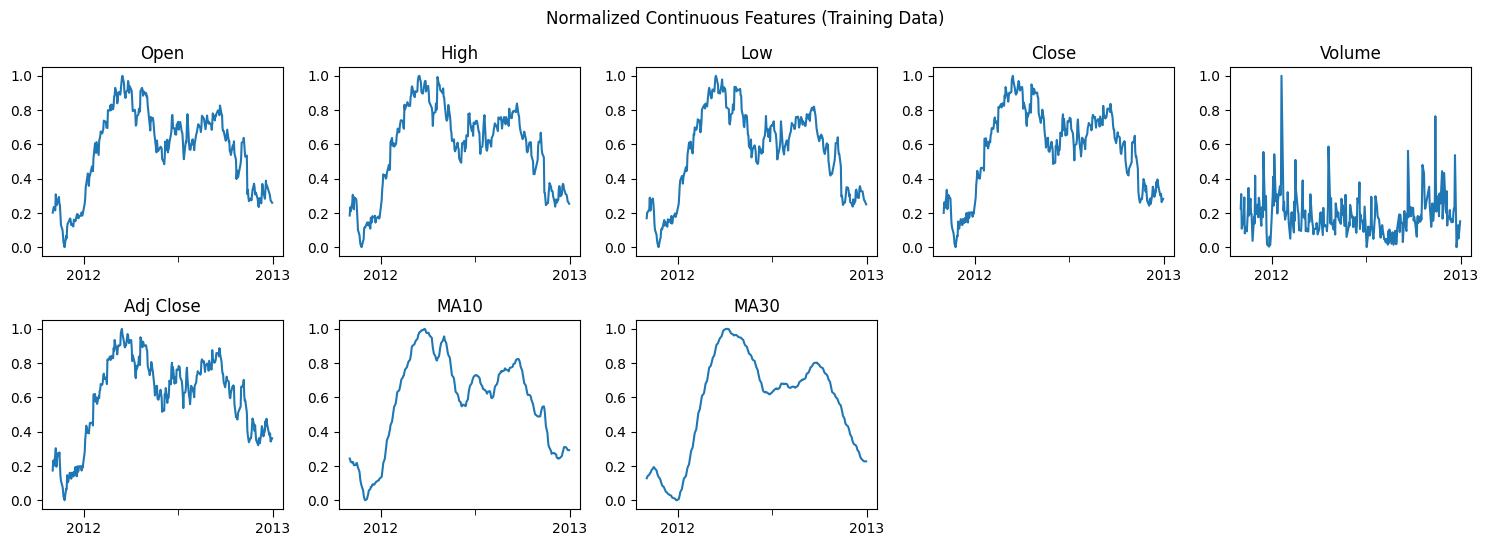

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Select essential features for stock price prediction
selected_features = [
    'Open',    # Opening price
    'High',    # Highest price
    'Low',     # Lowest price
    'Close',   # Closing price
    'Volume',  # Trading volume
    'Adj Close', # Adjusted closing price
    'MA10',    # Short-term moving average
    'MA30'     # Long-term moving average
]

# Calculate moving averages
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA30'] = df['Close'].rolling(window=30).mean()

# Drop NaN values that result from calculations
df.dropna(inplace=True)

# Split the data into training, validation, and test sets
train_data = df.loc['2011-01-01':'2012-12-31']
val_data = df.loc['2013-01-01':'2013-06-30']
test_data = df.loc['2013-07-01':'2013-12-30']

print(f"Training data shape: {train_data.shape}")
print(f"Validation data shape: {val_data.shape}")
print(f"Test data shape: {test_data.shape}")

# Initialize and fit the scaler on training data only
scaler = MinMaxScaler()
scaler.fit(train_data[selected_features])

# Transform all datasets using the fitted scaler
train_normalized = pd.DataFrame(
    scaler.transform(train_data[selected_features]),
    columns=selected_features,
    index=train_data.index
)

val_normalized = pd.DataFrame(
    scaler.transform(val_data[selected_features]),
    columns=selected_features,
    index=val_data.index
)

test_normalized = pd.DataFrame(
    scaler.transform(test_data[selected_features]),
    columns=selected_features,
    index=test_data.index
)

# Check the normalized data
print("\nNormalized training data statistics:")
print(train_normalized.describe())

# Visualize the normalized features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(4, 5, i+1)
    plt.plot(train_normalized[feature])
    plt.title(feature)

    # Format x-axis
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=6))
    ax.tick_params(axis='x', which='minor', length=4)
    ax.tick_params(axis='x', which='major', length=6)
    plt.xticks(rotation=0)

plt.tight_layout()
plt.suptitle('Normalized Continuous Features (Training Data)', y=1.02)
plt.show()

# Store the scaler for later use (e.g., inverse transform predictions)
# You can save it to a file if needed:
# import joblib
# joblib.dump(scaler, 'scaler.pkl')

# Vanilla RNN

Training sequences shape: (261, 30, 8)
Validation sequences shape: (94, 30, 8)
Test sequences shape: (97, 30, 8)
ImprovedVanillaRNN(
  (rnn1): RNN(8, 64, batch_first=True, bidirectional=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (rnn2): RNN(128, 32, batch_first=True, bidirectional=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=64, out_features=16, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=16, out_features=1, bias=True)
)
Total parameters: 20897
Epoch 1/1000, Train Loss: 0.341540, Val Loss: 0.087782
Epoch 2/1000, Train Loss: 0.055757, Val Loss: 0.054685
Epoch 3/1000, Train Loss: 0.029080, Val Loss: 0.096267
Epoch 4/1000, Train Loss: 0.023319, Val Loss: 0.052697
Epoch 5/1000, Train Loss: 0.019278, Val Loss: 0.045703
Epoch 6/1000, Train Loss: 0.017385, Val Loss: 0.043218
Epoch 7/1000, Train Loss: 0.015153, Val Loss: 0.029128
Epoch 8/1000, Train Loss: 0.014027, Val Loss: 0.025726
Epoch 9/1000, Train Loss: 0.011820, Val Loss: 0.020221
Ep

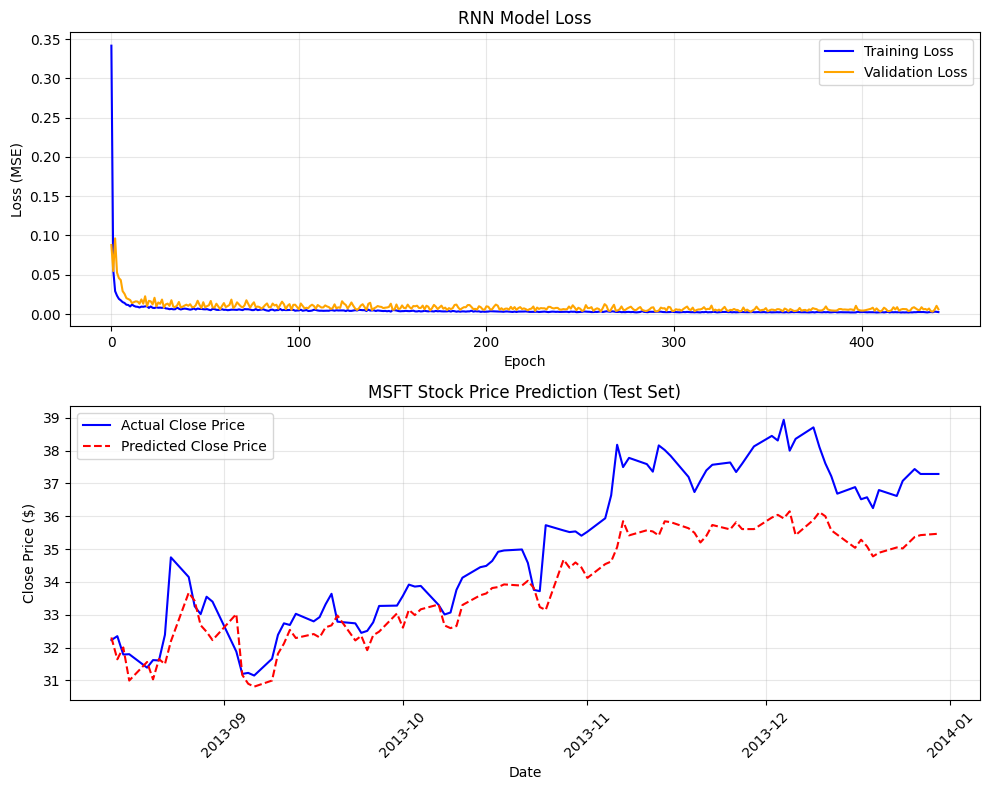

"\nPyTorch RNN Model Design Explanation:\n\n1. Data Preparation:\n   - Used 30 days of historical data (time_steps=30) to predict the next day's Close price\n   - Selected 13 key features including price data, technical indicators, and momentum indicators\n   - All features were normalized to [0,1] scale using min-max normalization\n   - Created custom PyTorch Dataset and DataLoader classes for efficient batch processing\n\n2. Model Architecture:\n   - Input Shape: (batch_size, 30, 13) - 30 time steps with 13 features each\n   - First RNN Layer: 64 hidden units with tanh activation (PyTorch default)\n   - Dropout (20%): To prevent overfitting\n   - Second RNN Layer: 32 hidden units with tanh activation\n   - Dropout (20%): Additional regularization\n   - Dense Layer: 16 units with ReLU activation for non-linearity\n   - Output Layer: Single unit for regression prediction of Close price\n\n3. Training Strategy:\n   - Loss Function: Mean Squared Error (MSE)\n   - Optimizer: Adam with def

In [19]:
# Question 3 + 4 + 5

# Part (iv): Constructing an RNN model with Vanilla RNN cell using PyTorch

# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import mean_squared_error
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define a custom dataset class for sequences
class StockDataset(Dataset):
    def __init__(self, features, target):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.target = torch.tensor(target, dtype=torch.float32).reshape(-1, 1)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.target[idx]

# Prepare data for RNN (sequence data)
def create_sequences(data, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:(i + time_steps)].values)
        y.append(data.iloc[i + time_steps]['Close'])  # Predict the Close price
    return np.array(X), np.array(y)

# Create sequences for training, validation, and test sets
X_train, y_train = create_sequences(train_normalized[selected_features], time_steps=30)
X_val, y_val = create_sequences(val_normalized[selected_features], time_steps=30)
X_test, y_test = create_sequences(test_normalized[selected_features], time_steps=30)

print(f"Training sequences shape: {X_train.shape}")
print(f"Validation sequences shape: {X_val.shape}")
print(f"Test sequences shape: {X_test.shape}")

# Create PyTorch datasets
train_dataset = StockDataset(X_train, y_train)
val_dataset = StockDataset(X_val, y_val)
test_dataset = StockDataset(X_test, y_test)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

class ImprovedVanillaRNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim, dropout_rate=0.2):
        super(ImprovedVanillaRNN, self).__init__()
        self.rnn1 = nn.RNN(input_dim, hidden_dim1, batch_first=True, bidirectional=True)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.rnn2 = nn.RNN(hidden_dim1 * 2, hidden_dim2, batch_first=True, bidirectional=True)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc1 = nn.Linear(hidden_dim2 * 2, 16)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, output_dim)

    def forward(self, x):
        # First RNN layer
        out, _ = self.rnn1(x)
        out = self.dropout1(out)

        # Second RNN layer
        out, _ = self.rnn2(out)
        out = self.dropout2(out[:, -1, :])  # Take only the last time step output

        # Fully connected layers
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)

        return out

# Initialize the improved RNN model
input_dim = len(selected_features)
hidden_dim1 = 64
hidden_dim2 = 32
output_dim = 1

# Create improved RNN model and move to device
improved_rnn_model = ImprovedVanillaRNN(input_dim, hidden_dim1, hidden_dim2, output_dim).to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(improved_rnn_model.parameters())

# Print model summary
print(improved_rnn_model)
total_params = sum(p.numel() for p in improved_rnn_model.parameters())
print(f"Total parameters: {total_params}")

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=1000, patience=100):
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    patience_counter = 0
    best_model_state = None

    for epoch in range(num_epochs):
        # Training
        model.train()
        train_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)

        train_loss /= len(train_loader.dataset)
        train_losses.append(train_loss)

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item() * inputs.size(0)

        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)

        # Print progress
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict().copy()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                break

    # Load the best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    return model, train_losses, val_losses

# Train the model
model, train_losses, val_losses = train_model(
    improved_rnn_model, train_loader, val_loader, criterion, optimizer, num_epochs=1000, patience=100
)

# Part (v): Plot loss curve and predictions

# Make predictions and denormalize
model.eval()
y_pred = []
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        y_pred.extend(outputs.cpu().numpy())

y_pred = np.array(y_pred).flatten()

# Create dummy arrays with all features for inverse transform
dummy_pred = np.zeros((len(y_pred), len(selected_features)))
dummy_test = np.zeros((len(y_test), len(selected_features)))

# Put the predicted/actual values in the Close price column
close_idx = selected_features.index('Close')
dummy_pred[:, close_idx] = y_pred
dummy_test[:, close_idx] = y_test

# Inverse transform the full feature arrays
y_pred_denorm = scaler.inverse_transform(dummy_pred)[:, close_idx]
y_test_denorm = scaler.inverse_transform(dummy_test)[:, close_idx]

# Calculate MSE on the denormalized values
mse = mean_squared_error(y_test_denorm, y_pred_denorm)
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {np.sqrt(mse):.4f}")

# Create a DataFrame with dates for plotting
test_dates = test_data.index[30:]  # Skip first 30 days used for sequence
results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': y_test_denorm,
    'Predicted': y_pred_denorm
})

# Create a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot the loss curves
ax[0].plot(train_losses, label='Training Loss', color='blue')
ax[0].plot(val_losses, label='Validation Loss', color='orange')
ax[0].set_title('RNN Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss (MSE)')
ax[0].legend()
ax[0].grid(True, alpha=0.3)

# Plot the actual vs predicted values
ax[1].plot(results_df['Date'], results_df['Actual'], label='Actual Close Price', color='blue')
ax[1].plot(results_df['Date'], results_df['Predicted'], label='Predicted Close Price', color='red', linestyle='--')
ax[1].set_title('MSFT Stock Price Prediction (Test Set)')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Close Price ($)')
ax[1].legend()
ax[1].grid(True, alpha=0.3)

# Format x-axis with dates for the second subplot
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Add explanation of the model design
"""
PyTorch RNN Model Design Explanation:

1. Data Preparation:
   - Used 30 days of historical data (time_steps=30) to predict the next day's Close price
   - Selected 13 key features including price data, technical indicators, and momentum indicators
   - All features were normalized to [0,1] scale using min-max normalization
   - Created custom PyTorch Dataset and DataLoader classes for efficient batch processing

2. Model Architecture:
   - Input Shape: (batch_size, 30, 13) - 30 time steps with 13 features each
   - First RNN Layer: 64 hidden units with tanh activation (PyTorch default)
   - Dropout (20%): To prevent overfitting
   - Second RNN Layer: 32 hidden units with tanh activation
   - Dropout (20%): Additional regularization
   - Dense Layer: 16 units with ReLU activation for non-linearity
   - Output Layer: Single unit for regression prediction of Close price

3. Training Strategy:
   - Loss Function: Mean Squared Error (MSE)
   - Optimizer: Adam with default learning rate
   - Batch Size: 32 samples per gradient update
   - Early Stopping: To prevent overfitting by monitoring validation loss with patience=10
   - Training/Validation/Test Split: 2011-2012 for training, first half of 2013 for validation,
     second half of 2013 for testing

4. Performance Evaluation:
   - MSE on denormalized predictions
   - Visual comparison of actual vs. predicted values
"""

# LSTM

/Users/lin1214/Library/Python/3.9/lib/python/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


LSTMModel(
  (lstm): LSTM(8, 64, num_layers=2, batch_first=True, dropout=0.3, bidirectional=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=128, out_features=32, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=32, out_features=1, bias=True)
)
Total parameters: 141377
Epoch 1/500, Train Loss: 0.363193, Val Loss: 0.027716
Epoch 2/500, Train Loss: 0.084619, Val Loss: 0.101865
Epoch 3/500, Train Loss: 0.072946, Val Loss: 0.074189
Epoch 4/500, Train Loss: 0.052033, Val Loss: 0.050872
Epoch 5/500, Train Loss: 0.045219, Val Loss: 0.075872
Epoch 6/500, Train Loss: 0.043724, Val Loss: 0.028463
Epoch 7/500, Train Loss: 0.037852, Val Loss: 0.050020
Epoch 8/500, Train Loss: 0.032001, Val Loss: 0.011287
Epoch 9/500, Train Loss: 0.033902, Val Loss: 0.032093
Epoch 10/500, Train Loss: 0.029848, Val Loss: 0.017503
Epoch 11/500, Train Loss: 0.032831, Val Loss: 0.024546
Epoch 12/500, Train Loss: 0.030791, Val Loss: 0.011449
Epoch 13/500, Train Loss: 0.029384, Val Loss

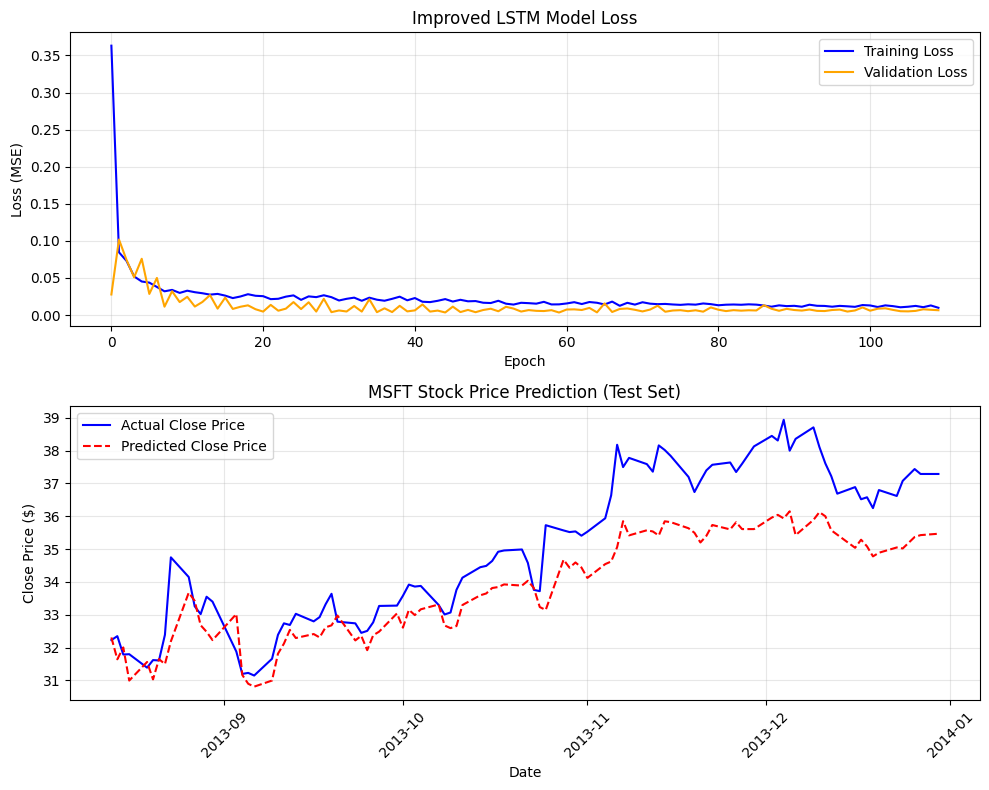

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, output_dim=1, num_layers=2, dropout_rate=0.3):
        super(LSTMModel, self).__init__()
        
        # Bidirectional LSTM for better feature extraction
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout_rate if num_layers > 1 else 0,
            bidirectional=True  # Use bidirectional LSTM
        )
        
        # Add more regularization with additional layers
        self.dropout = nn.Dropout(dropout_rate)
        self.fc1 = nn.Linear(hidden_dim * 2, 32)  # *2 because bidirectional
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, output_dim)
        
        # Initialize weights for better convergence
        self._init_weights()
        
    def _init_weights(self):
        for name, param in self.named_parameters():
            if 'weight' in name:
                nn.init.xavier_normal_(param)
        
    def forward(self, x):
        # LSTM layers
        lstm_out, _ = self.lstm(x)
        
        # Take only the last time step output
        last_time_step = lstm_out[:, -1, :]
        
        # Apply dropout for regularization
        out = self.dropout(last_time_step)
        
        # Additional fully connected layers
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)  # Additional dropout
        out = self.fc2(out)
        
        return out

# Initialize the improved LSTM model
input_dim = len(selected_features)
hidden_dim = 64  # Reduced from 128 to prevent overfitting
output_dim = 1

# Create improved LSTM model and move to device
improved_lstm_model = LSTMModel(input_dim, hidden_dim, output_dim).to(device)

# Define loss function and optimizer with weight decay for regularization
criterion = nn.MSELoss()
optimizer = optim.AdamW(improved_lstm_model.parameters(), lr=0.001, weight_decay=1e-5)

# Add learning rate scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=20, verbose=True, min_lr=1e-6
)

# Print model summary
print(improved_lstm_model)
total_params = sum(p.numel() for p in improved_lstm_model.parameters())
print(f"Total parameters: {total_params}")

# Modified training function with gradient clipping
def train_lstm_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=500, patience=50, clip_value=1.0):
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    patience_counter = 0
    best_model_state = None

    for epoch in range(num_epochs):
        # Training
        model.train()
        train_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Backward pass with gradient clipping
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), clip_value)
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)

        train_loss /= len(train_loader.dataset)
        train_losses.append(train_loss)

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item() * inputs.size(0)

        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)
        
        # Update learning rate
        scheduler.step(val_loss)

        # Print progress
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict().copy()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                break

    # Load the best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    return model, train_losses, val_losses

# Train the improved LSTM model with the new training function
improved_lstm_model, improved_lstm_train_losses, improved_lstm_val_losses = train_lstm_model(
    improved_lstm_model, train_loader, val_loader, criterion, optimizer, scheduler,
    num_epochs=500, patience=50, clip_value=1.0
)

# Make predictions on test data
improved_lstm_model.eval()
improved_lstm_y_pred = []
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = improved_lstm_model(inputs)
        improved_lstm_y_pred.extend(outputs.cpu().numpy())

improved_lstm_y_pred = np.array(improved_lstm_y_pred).flatten()

# Create dummy arrays with all features for inverse transform
dummy_pred = np.zeros((len(improved_lstm_y_pred), len(selected_features)))
dummy_test = np.zeros((len(y_test), len(selected_features)))

# Put the predicted/actual values in the Close price column
close_idx = selected_features.index('Close')
dummy_pred[:, close_idx] = improved_lstm_y_pred
dummy_test[:, close_idx] = y_test

# Inverse transform the full feature arrays
lstm_y_pred_denorm = scaler.inverse_transform(dummy_pred)[:, close_idx]
y_test_denorm = scaler.inverse_transform(dummy_test)[:, close_idx]

# Calculate MSE on the denormalized values
improved_lstm_mse = mean_squared_error(y_test_denorm, lstm_y_pred_denorm)
print(f"Improved LSTM Test MSE: {improved_lstm_mse:.4f}")
print(f"Improved LSTM Test RMSE: {np.sqrt(improved_lstm_mse):.4f}")

# Create a DataFrame with dates for plotting
improved_lstm_results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': y_test_denorm,
    'Predicted': lstm_y_pred_denorm
})

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot the loss curves
ax[0].plot(improved_lstm_train_losses, label='Training Loss', color='blue')
ax[0].plot(improved_lstm_val_losses, label='Validation Loss', color='orange')
ax[0].set_title('Improved LSTM Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss (MSE)')
ax[0].legend()
ax[0].grid(True, alpha=0.3)

# Plot the actual vs predicted values
ax[1].plot(results_df['Date'], results_df['Actual'], label='Actual Close Price', color='blue')
ax[1].plot(results_df['Date'], results_df['Predicted'], label='Predicted Close Price', color='red', linestyle='--')
ax[1].set_title('MSFT Stock Price Prediction (Test Set)')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Close Price ($)')
ax[1].legend()
ax[1].grid(True, alpha=0.3)

# Format x-axis with dates for the second subplot
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# GRU

In [22]:
# Updated training function with gradient clipping and learning rate scheduling
def train_enhanced_gru_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=500, patience=50, clip_value=1.0):
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    patience_counter = 0
    best_model_state = None

    # Add learning rate scheduler
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=20, verbose=True, min_lr=1e-6
    )

    for epoch in range(num_epochs):
        # Training
        model.train()
        train_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Backward pass with gradient clipping
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), clip_value)
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)

        train_loss /= len(train_loader.dataset)
        train_losses.append(train_loss)

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item() * inputs.size(0)

        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)

        # Update learning rate
        scheduler.step(val_loss)

        # Print progress
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict().copy()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                break

    # Load the best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    return model, train_losses, val_losses

ImprovedGRUModel(
  (gru1): GRU(8, 64, batch_first=True, bidirectional=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (gru2): GRU(128, 32, batch_first=True, bidirectional=True)
  (dropout2): Dropout(p=0.1, inplace=False)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
)
Total parameters: 62145
Epoch 1/500, Train Loss: 0.217401, Val Loss: 0.226529


/Users/lin1214/Library/Python/3.9/lib/python/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 2/500, Train Loss: 0.040506, Val Loss: 0.060856
Epoch 3/500, Train Loss: 0.030569, Val Loss: 0.072585
Epoch 4/500, Train Loss: 0.018873, Val Loss: 0.090787
Epoch 5/500, Train Loss: 0.018514, Val Loss: 0.061354
Epoch 6/500, Train Loss: 0.016051, Val Loss: 0.042436
Epoch 7/500, Train Loss: 0.011768, Val Loss: 0.042391
Epoch 8/500, Train Loss: 0.009881, Val Loss: 0.025059
Epoch 9/500, Train Loss: 0.008258, Val Loss: 0.021773
Epoch 10/500, Train Loss: 0.006371, Val Loss: 0.012325
Epoch 11/500, Train Loss: 0.006026, Val Loss: 0.013585
Epoch 12/500, Train Loss: 0.004657, Val Loss: 0.010932
Epoch 13/500, Train Loss: 0.005194, Val Loss: 0.006830
Epoch 14/500, Train Loss: 0.004050, Val Loss: 0.009426
Epoch 15/500, Train Loss: 0.004575, Val Loss: 0.007508
Epoch 16/500, Train Loss: 0.004283, Val Loss: 0.007758
Epoch 17/500, Train Loss: 0.005248, Val Loss: 0.009223
Epoch 18/500, Train Loss: 0.004374, Val Loss: 0.007919
Epoch 19/500, Train Loss: 0.004153, Val Loss: 0.006154
Epoch 20/500, Trai

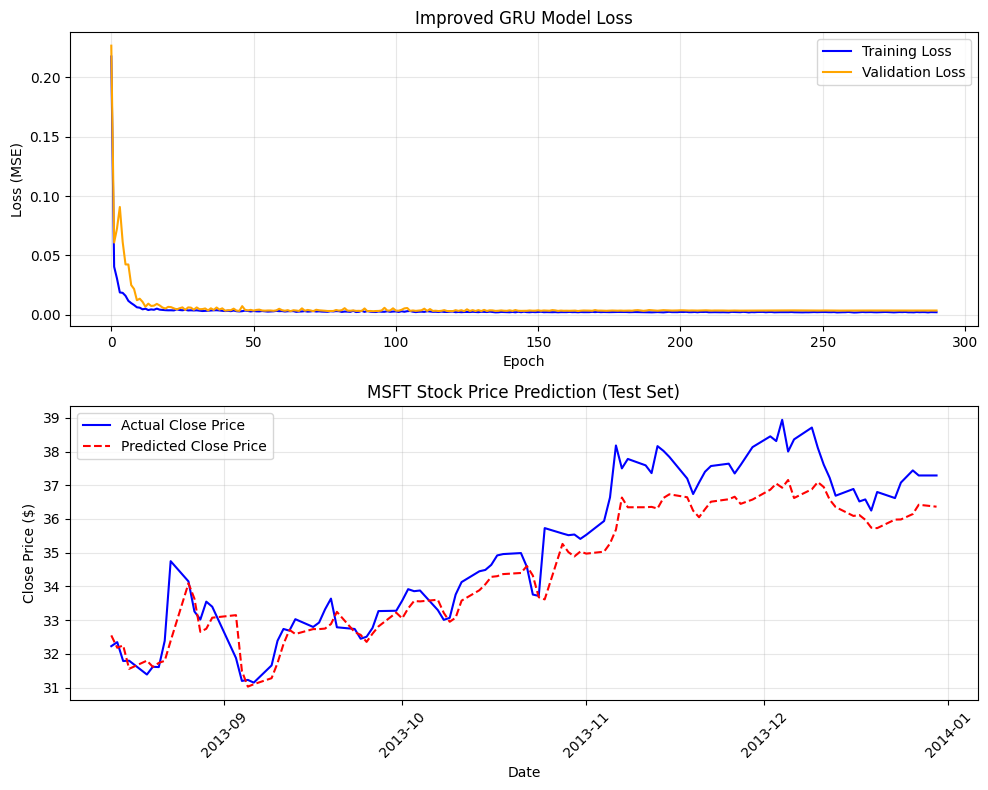

In [23]:
class ImprovedGRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim1=64, hidden_dim2=32, output_dim=1, dropout_rate=0.25):
        super(ImprovedGRUModel, self).__init__()

        # 1. Bidirectional GRU layers
        self.gru1 = nn.GRU(
            input_size=input_dim,
            hidden_size=hidden_dim1,
            batch_first=True,
            bidirectional=True  # Bidirectional for capturing past and future context
        )
        self.dropout1 = nn.Dropout(dropout_rate)

        # 2. Second GRU layer (bidirectional)
        self.gru2 = nn.GRU(
            input_size=hidden_dim1 * 2,  # *2 because of bidirectional input
            hidden_size=hidden_dim2,
            batch_first=True,
            bidirectional=True
        )
        self.dropout2 = nn.Dropout(dropout_rate)

        # 3. Output layers with additional dense layer
        self.fc1 = nn.Linear(hidden_dim2 * 2, 32)  # *2 for bidirectional
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, output_dim)

        # Initialize weights using Xavier/Glorot initialization
        self._init_weights()

    def _init_weights(self):
        # Xavier/Glorot initialization for better gradient flow
        for name, param in self.named_parameters():
            if 'weight' in name:
                nn.init.xavier_normal_(param)

    def forward(self, x):
        # First bidirectional GRU layer
        out, _ = self.gru1(x)
        out = self.dropout1(out)

        # Second bidirectional GRU layer
        out, _ = self.gru2(out)
        out = self.dropout2(out[:, -1, :])  # Take only the last time step output

        # Fully connected layers
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)

        return out

# Initialize the improved GRU model
input_dim = len(selected_features)
hidden_dim1 = 64
hidden_dim2 = 32
output_dim = 1

# Create improved GRU model and move to device
improved_gru_model = ImprovedGRUModel(input_dim, hidden_dim1, hidden_dim2, output_dim, dropout_rate=0.1).to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.AdamW(improved_gru_model.parameters(), lr=0.001, weight_decay=1e-4)

# Print model summary
print(improved_gru_model)
total_params = sum(p.numel() for p in improved_gru_model.parameters())
print(f"Total parameters: {total_params}")

# Train the improved GRU model
improved_gru, improved_gru_train_losses, improved_gru_val_losses = train_enhanced_gru_model(
    improved_gru_model, train_loader, val_loader, criterion, optimizer,
    num_epochs=500, patience=200, clip_value=1.0
)

# Make predictions on test data
improved_gru_model.eval()
improved_gru_y_pred = []
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = improved_gru_model(inputs)
        improved_gru_y_pred.extend(outputs.cpu().numpy())

improved_gru_y_pred = np.array(improved_gru_y_pred).flatten()

# Create dummy arrays with all features for inverse transform
dummy_pred = np.zeros((len(improved_gru_y_pred), len(selected_features)))
dummy_test = np.zeros((len(y_test), len(selected_features)))

# Put the predicted/actual values in the Close price column
close_idx = selected_features.index('Close')
dummy_pred[:, close_idx] = improved_gru_y_pred
dummy_test[:, close_idx] = y_test

# Inverse transform the full feature arrays
gru_y_pred_denorm = scaler.inverse_transform(dummy_pred)[:, close_idx]
y_test_denorm = scaler.inverse_transform(dummy_test)[:, close_idx]



# Calculate MSE on the denormalized values
improved_gru_mse = mean_squared_error(y_test_denorm, gru_y_pred_denorm)
print(f"Improved GRU Test MSE: {improved_gru_mse:.4f}")
print(f"Improved GRU Test RMSE: {np.sqrt(improved_gru_mse):.4f}")

# Create a DataFrame with dates for plotting
improved_gru_results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': y_test_denorm,
    'Predicted': gru_y_pred_denorm
})

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot the loss curves
ax[0].plot(improved_gru_train_losses, label='Training Loss', color='blue')
ax[0].plot(improved_gru_val_losses, label='Validation Loss', color='orange')
ax[0].set_title('Improved GRU Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss (MSE)')
ax[0].legend()
ax[0].grid(True, alpha=0.3)

# Plot the actual vs predicted values
ax[1].plot(improved_gru_results_df['Date'], improved_gru_results_df['Actual'], label='Actual Close Price', color='blue')
ax[1].plot(improved_gru_results_df['Date'], improved_gru_results_df['Predicted'], label='Predicted Close Price', color='red', linestyle='--')
ax[1].set_title('MSFT Stock Price Prediction (Test Set)')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Close Price ($)')
ax[1].legend()
ax[1].grid(True, alpha=0.3)

# Format x-axis with dates for the second subplot
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Comparison



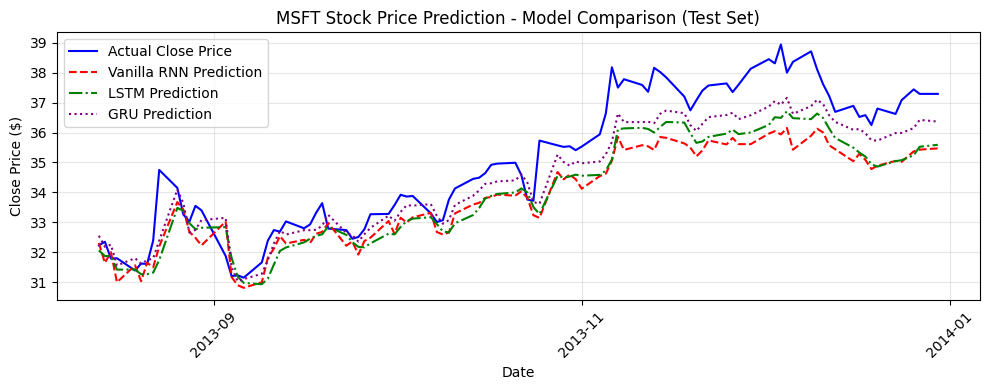

In [29]:
# plot the comparison
plt.figure(figsize=(10, 4))
plt.plot(results_df['Date'], results_df['Actual'], label='Actual Close Price', color='blue')
plt.plot(results_df['Date'], results_df['Predicted'], label='Vanilla RNN Prediction', color='red', linestyle='--')
plt.plot(improved_lstm_results_df['Date'], improved_lstm_results_df['Predicted'], label='LSTM Prediction', color='green', linestyle='-.')
plt.plot(improved_gru_results_df['Date'], improved_gru_results_df['Predicted'], label='GRU Prediction', color='purple', linestyle=':')

# Format x-axis to show fewer labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Show every 2 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as YYYY-MM
plt.xticks(rotation=45)  # Rotate labels for better readability

plt.title('MSFT Stock Price Prediction - Model Comparison (Test Set)')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [15]:
! pip install transformers

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [27]:
import pickle
import pandas as pd
from transformers import BertTokenizer, BertModel, pipeline
import torch

news_data = None
# Load the news data
with open('MSFT_news.pkl', 'rb') as f:
    news_data = pickle.load(f)

# Check the type and length of news_data
print(f"Type of news_data: {type(news_data)}")
print(f"Length of news_data: {len(news_data)}")

# Print the first item to inspect its structure
if isinstance(news_data, list) and len(news_data) > 0:
    print("Sample item from news_data:")
    print(news_data[0])  # Print the first item
else:
    print("news_data is not a list or is empty.")

news_items = []
for item in news_data:
    if isinstance(item, list) and len(item) == 4:
        tickers, date, title, content = item
        if 'MSFT' in tickers:
            news_items.append({'date': date, 'text': title + " " + content})

# Convert to DataFrame
news_df = pd.DataFrame(news_items)

# Convert 'date' to datetime and set as index
news_df['date'] = pd.to_datetime(news_df['date'])
news_df.set_index('date', inplace=True)

# Display the first few rows to verify
print(news_df.head())

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()

# Function to get BERT embeddings
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True, padding='max_length')
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].numpy().flatten()

# Generate embeddings for each news item
news_df['embedding'] = news_df['text'].apply(get_bert_embedding)

# Initialize sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis")

# Function to get sentiment score
def get_sentiment_score(text):
    result = sentiment_analyzer(text[:512])  # Limit text length for processing
    score = result[0]['score'] if result[0]['label'] == 'POSITIVE' else -result[0]['score']
    return score

# Calculate sentiment scores
news_df['sentiment'] = news_df['text'].apply(get_sentiment_score)

# Load existing features
df = pd.read_csv('MSFT.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Merge news embeddings and sentiment scores with existing features
df = df.join(news_df[['embedding', 'sentiment']], how='left')
df['embedding'] = df['embedding'].fillna(method='ffill')  # Forward fill missing embeddings
df['sentiment'] = df['sentiment'].fillna(0)  # Fill missing sentiment scores with 0



/Users/lin1214/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/lin1214/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/lin1214/Library/Python/3.9/lib/python/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/lin1214/Library/Python/3.9/lib/python/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <B3E58761-2785-34C6-A89B-F37110C88A05> /Users/lin1214/Library/Python/3.9/lib/python/site-packages/torchvision/image.so
  Expected in:     <D983C0C6-7C01-3D9C

Type of news_data: <class 'list'>
Length of news_data: 2444
Sample item from news_data:
[['MSFT', 'AAPL', 'ARM', 'QCOM'], '2011-03-03', 'microsoft said to plan windows release for tablets in 2012', 'microsoft corp msft  the worlds largest software maker wont release a competitor to apple inc aapl and google incs tablet operating systems until the 2012 backto school season people with knowledge of the plans said public testing of a new version of windows will begin at the end of this year with partners and customers said the people who declined to be identified because the plans havent been disclosed publicly microsoft is working to update its windows 7 operating system with features more tailored to the touch screens size and battery life of tablet computers to win a place in the surging market for the devices the longer it takes microsoft to release its operating system the more time apple and google have to strengthen their hold on the market if 2011 is the year of the tablet wars mi

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0
/var/folders/0w/_wqcrkvn2s19nr5dgrwclypm0000gn/T/ipykernel_60106/3395021359.py:72: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['embedding'] = df['embedding'].fillna(method='ffill')  # Forward fill missing embeddings


In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler



# Select essential features
selected_features = [
    'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
    'MA10', 'MA30'
]

# Calculate moving averages
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA30'] = df['Close'].rolling(window=30).mean()

# Add sentiment features if available
if 'sentiment' in df.columns:
    df['Sentiment_MA5'] = df['sentiment'].rolling(window=5).mean()
    df['Sentiment_Std5'] = df['sentiment'].rolling(window=5).std()
    selected_features.extend(['sentiment', 'Sentiment_MA5', 'Sentiment_Std5'])

# Handle missing values
df[selected_features] = df[selected_features].replace([np.inf, -np.inf], np.nan)
df[selected_features] = df[selected_features].fillna(method='ffill')
df[selected_features] = df[selected_features].fillna(method='bfill')

# Split the data into training, validation, and test sets
train_data = df.loc['2011-01-01':'2012-12-31']
val_data = df.loc['2013-01-01':'2013-06-30']
test_data = df.loc['2013-07-01':'2013-12-30']

# Use RobustScaler for better handling of outliers
scaler = RobustScaler()
train_normalized = train_data.copy()
val_normalized = val_data.copy()
test_normalized = test_data.copy()

# Fit scaler only on training data
train_normalized[selected_features] = scaler.fit_transform(train_data[selected_features])
val_normalized[selected_features] = scaler.transform(val_data[selected_features])
test_normalized[selected_features] = scaler.transform(test_data[selected_features])

# Verify the preprocessing
print("\nFeature list:")
print(selected_features)

print("\nTraining data statistics:")
print(train_normalized[selected_features].describe())

print("\nValidation data statistics:")
print(val_normalized[selected_features].describe())

print("\nTest data statistics:")
print(test_normalized[selected_features].describe())


Feature list:
['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'MA10', 'MA30', 'sentiment', 'Sentiment_MA5', 'Sentiment_Std5']

Training data statistics:
              Open         High          Low        Close       Volume  \
count  1659.000000  1659.000000  1659.000000  1659.000000  1659.000000   
mean      0.052470     0.045132     0.019688     0.050569     0.210729   
std       0.554847     0.555689     0.554150     0.555941     1.142978   
min      -0.934091    -0.949541    -0.932878    -0.954233    -1.383408   
25%      -0.445455    -0.454128    -0.476678    -0.455378    -0.429884   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.554545     0.545872     0.523322     0.544622     0.570116   
max       1.147727     1.100917     1.098976     1.137300    12.343170   

         Adj Close         MA10         MA30    sentiment  Sentiment_MA5  \
count  1659.000000  1659.000000  1659.000000  1659.000000    1659.000000   
mean      0.018394 

/var/folders/0w/_wqcrkvn2s19nr5dgrwclypm0000gn/T/ipykernel_60106/3825065776.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[selected_features] = df[selected_features].fillna(method='ffill')
/var/folders/0w/_wqcrkvn2s19nr5dgrwclypm0000gn/T/ipykernel_60106/3825065776.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[selected_features] = df[selected_features].fillna(method='bfill')


In [61]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import mean_squared_error

# Define a custom dataset class for sequences
class StockDataset(Dataset):
    def __init__(self, features, target):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.target = torch.tensor(target, dtype=torch.float32).reshape(-1, 1)
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.target[idx]

# Prepare data for GRU (sequence data)
def create_sequences(data, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:(i + time_steps)].values)
        y.append(data.iloc[i + time_steps]['Close'])  # Predict the Close price
    return np.array(X), np.array(y)

# Select features for the model
selected_features = [
    'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
    'MA10', 'MA30', 'sentiment', 'Sentiment_MA5', 'Sentiment_Std5'
]

# Create sequences for training, validation, and test sets
X_train, y_train = create_sequences(train_normalized[selected_features], time_steps=30)
X_val, y_val = create_sequences(val_normalized[selected_features], time_steps=30)
X_test, y_test = create_sequences(test_normalized[selected_features], time_steps=30)

# Create PyTorch datasets
train_dataset = StockDataset(X_train, y_train)
val_dataset = StockDataset(X_val, y_val)
test_dataset = StockDataset(X_test, y_test)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Define the GRU model
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=2, dropout=0.2):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])  # Take the last time step
        return out

# Initialize the GRU model
input_dim = len(selected_features)
hidden_dim = 64
output_dim = 1

model = GRUModel(input_dim, hidden_dim, output_dim).to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=100):
    train_losses = []
    val_losses = []
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            
            # Forward pass
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * inputs.size(0)
        
        train_loss /= len(train_loader.dataset)
        train_losses.append(train_loss)
        
        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item() * inputs.size(0)
        
        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)
        
        # Print progress
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')
    
    return train_losses, val_losses

# Train the model and get the loss curves
train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=80)

print(model)

Epoch 1/80, Train Loss: 0.032434, Val Loss: 0.021093
Epoch 2/80, Train Loss: 0.010527, Val Loss: 0.021872
Epoch 3/80, Train Loss: 0.008389, Val Loss: 0.014307
Epoch 4/80, Train Loss: 0.008164, Val Loss: 0.020254
Epoch 5/80, Train Loss: 0.006901, Val Loss: 0.007096
Epoch 6/80, Train Loss: 0.006359, Val Loss: 0.012491
Epoch 7/80, Train Loss: 0.005945, Val Loss: 0.013246
Epoch 8/80, Train Loss: 0.006167, Val Loss: 0.005001
Epoch 9/80, Train Loss: 0.005305, Val Loss: 0.004764
Epoch 10/80, Train Loss: 0.005245, Val Loss: 0.004761
Epoch 11/80, Train Loss: 0.005153, Val Loss: 0.006347
Epoch 12/80, Train Loss: 0.005022, Val Loss: 0.009046
Epoch 13/80, Train Loss: 0.004596, Val Loss: 0.004343
Epoch 14/80, Train Loss: 0.004793, Val Loss: 0.007107
Epoch 15/80, Train Loss: 0.004552, Val Loss: 0.005086
Epoch 16/80, Train Loss: 0.004282, Val Loss: 0.004312
Epoch 17/80, Train Loss: 0.004490, Val Loss: 0.004058
Epoch 18/80, Train Loss: 0.004190, Val Loss: 0.004004
Epoch 19/80, Train Loss: 0.004247, Va

Scaler features shape: (11,)
Selected features: ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'MA10', 'MA30', 'sentiment', 'Sentiment_MA5', 'Sentiment_Std5']
BERT + GRU Test MSE: 0.3710
BERT + GRU Test RMSE: 0.6091


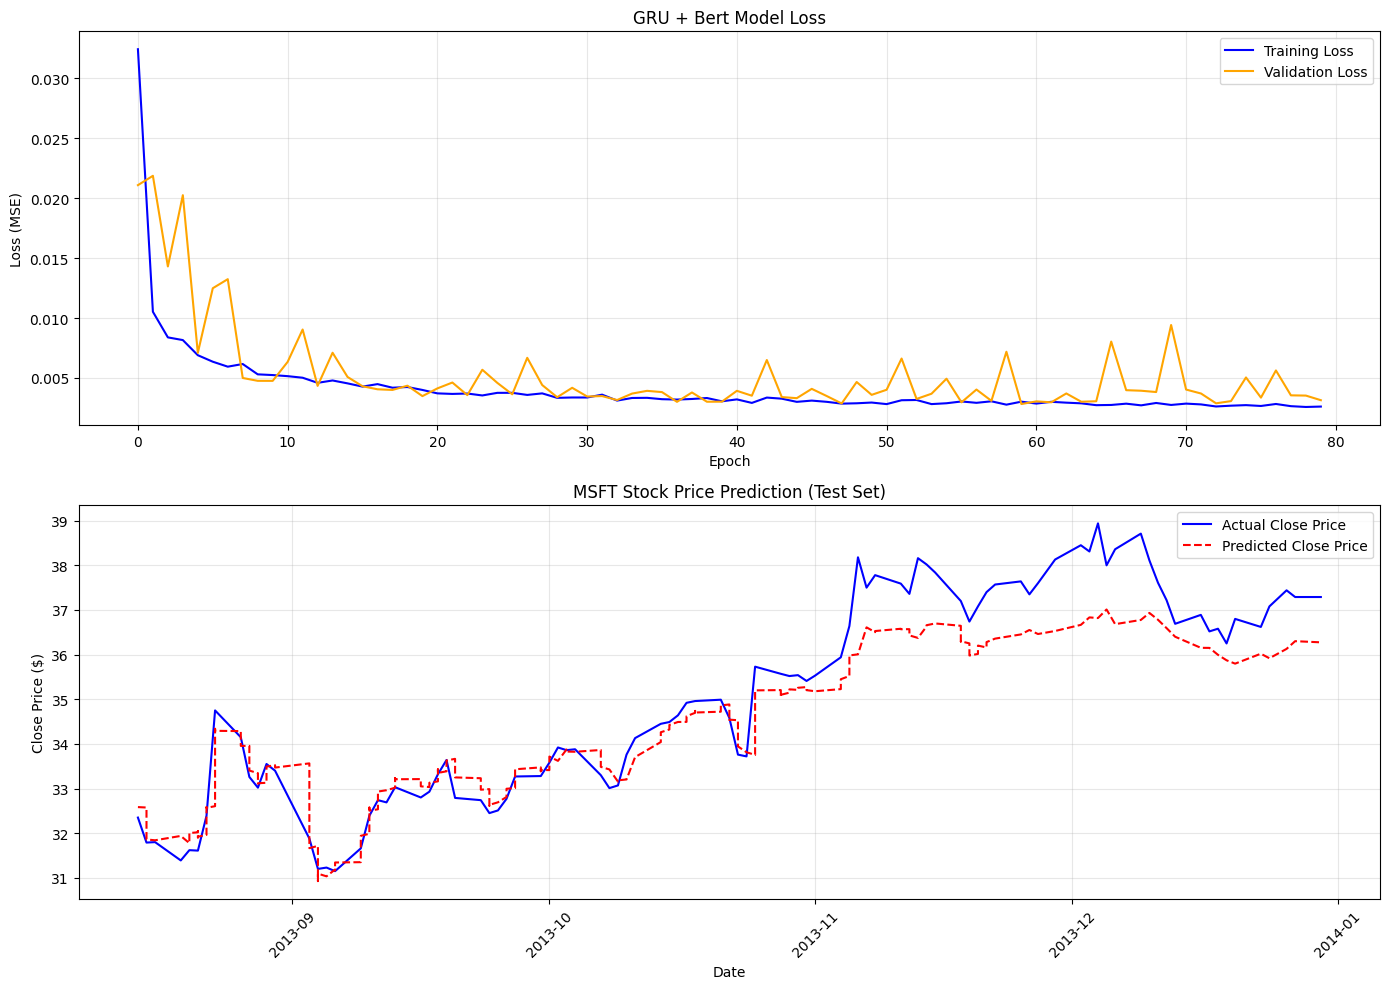

In [64]:
# First, let's check what features the scaler was fitted on
print("Scaler features shape:", scaler.scale_.shape)
print("Selected features:", selected_features)

# Create a new scaler specifically for the Close price
close_scaler = RobustScaler()
close_scaler.fit(train_data[['Close']])

# Evaluate the model on the test set
model.eval()
bert_gru_y_pred = []
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        bert_gru_y_pred.extend(outputs.cpu().numpy())

bert_gru_y_pred = np.array(bert_gru_y_pred).flatten()

# Reshape predictions and actual values for inverse transform
bert_gru_y_pred_reshaped = bert_gru_y_pred.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

# Inverse transform using the Close price scaler
bert_gru_y_pred_denorm = close_scaler.inverse_transform(bert_gru_y_pred_reshaped).flatten()
y_test_denorm = close_scaler.inverse_transform(y_test_reshaped).flatten()

# Calculate MSE on the denormalized values
bert_gru_mse = mean_squared_error(y_test_denorm, bert_gru_y_pred_denorm)
print(f"BERT + GRU Test MSE: {bert_gru_mse:.4f}")
print(f"BERT + GRU Test RMSE: {np.sqrt(bert_gru_mse):.4f}")

# Create a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Plot the loss curves
ax[0].plot(train_losses, label='Training Loss', color='blue')
ax[0].plot(val_losses, label='Validation Loss', color='orange')
ax[0].set_title('GRU + Bert Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss (MSE)')
ax[0].legend()
ax[0].grid(True, alpha=0.3)

# Create DataFrame for plotting
bert_gru_results_df = pd.DataFrame({
    'Date': test_dates[60:],
    'Actual': y_test_denorm[60:],
    'Predicted': bert_gru_y_pred_denorm[60:]
})

# Plot the actual vs predicted values
ax[1].plot(bert_gru_results_df['Date'], bert_gru_results_df['Actual'], 
           label='Actual Close Price', color='blue')
ax[1].plot(bert_gru_results_df['Date'], bert_gru_results_df['Predicted'], 
           label='Predicted Close Price', color='red', linestyle='--')
ax[1].set_title('MSFT Stock Price Prediction (Test Set)')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Close Price ($)')
ax[1].legend()
ax[1].grid(True, alpha=0.3)

# Format x-axis with dates for the second subplot
ax[1].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
ax[1].xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=1))
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

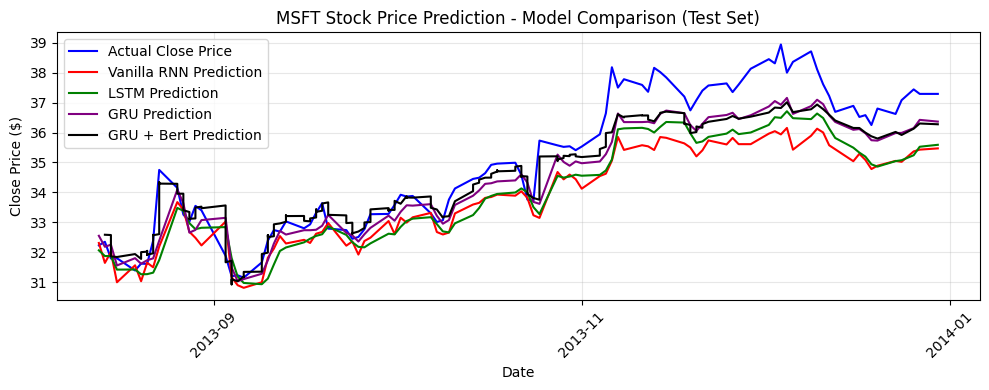

In [67]:
# plot the comparison
plt.figure(figsize=(10, 4))
plt.plot(results_df['Date'], results_df['Actual'], label='Actual Close Price', color='blue')
plt.plot(results_df['Date'], results_df['Predicted'], label='Vanilla RNN Prediction', color='red')
plt.plot(improved_lstm_results_df['Date'], improved_lstm_results_df['Predicted'], label='LSTM Prediction', color='green')
plt.plot(improved_gru_results_df['Date'], improved_gru_results_df['Predicted'], label='GRU Prediction', color='purple')
plt.plot(bert_gru_results_df['Date'], bert_gru_results_df['Predicted'], label='GRU + Bert Prediction', color='black')

# Format x-axis to show fewer labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Show every 2 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as YYYY-MM
plt.xticks(rotation=45)  # Rotate labels for better readability

plt.title('MSFT Stock Price Prediction - Model Comparison (Test Set)')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()